In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db=mysql.connector.connect(host='localhost',username='root',password='Ayushi@25',database='ecommerce')

cur=db.cursor()

C:\Users\ayushi verma\AppData\Local\Temp\ipykernel_19752\2250111200.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


* Basic Queries:-
1-List all unique cities where customers are located.

In [2]:
query = "select distinct customer_city from customers"
cur.execute(query)
data = cur.fetchall()
df=pd.DataFrame(data)
df.head()


,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


2- Count the number of orders placed in 2017.

In [5]:
query = "select count(order_id) from orders where year(order_purchase_timestamp) = 2017 "
cur.execute(query)
data = cur.fetchall()
data

[(360808,)]

3-Find the total sales per category.

In [6]:
query = "select (products.product_category) Category, round(sum(payments.payment_value),2) Sales from products join order_items on products.product_id=order_items.product_id join payments on payments.order_id=order_items.order_id group by Category"

cur.execute(query)
data = cur.fetchall()
data

[('perfumery', 88679265.48),
 ('Furniture Decoration', 250280868.56),
 ('telephony', 85204358.87),
 ('Fashion Bags and Accessories', 38177699.0),
 ('bed table bath', 299696892.43),
 ('automotive', 149151507.95),
 ('computer accessories', 277432828.1),
 ('housewares', 191582672.8),
 ('babies', 94472990.45),
 ('toys', 108331595.66),
 ('Furniture office', 113194635.25),
 ('Cool Stuff', 136447150.01),
 ('HEALTH BEAUTY', 290040295.89),
 ('pet Shop', 54472069.8),
 ('General Interest Books', 11321582.93),
 ('stationary store', 55552012.19),
 ('Watches present', 250112918.75),
 ('PCs', 48846271.14),
 ('climatization', 15954865.41),
 ('Construction Tools Construction', 42258235.3),
 ('sport leisure', 243622322.85),
 ('Bags Accessories', 32751475.82),
 ('electronics', 45474992.44),
 ('Casa Construcao', 23912925.8),
 ('Games consoles', 34209066.35),
 ('home appliances', 16718147.22),
 ('Garden tools', 146699131.39),
 ('Agro Industria e Comercio', 20777856.84),
 (None, 44240299.26),
 ('audio', 105

##**For same we can create dataframe ="df = pd.DataFrame(data)"& can give columns name.="df = pd.DataFrame(data, columns=["Categories","Sales"])"-Ex below-

In [3]:
query = "select upper(products.product_category) Category, round(sum(payments.payment_value),2) Sales from products join order_items on products.product_id=order_items.product_id join payments on payments.order_id=order_items.order_id group by Category"

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df = pd.DataFrame(data, columns=["Categories","Sales"])
df.head()

4- Calculate the percentage of orders that were paid in installments.

In [2]:
query= "select (sum(case when payment_installments >=1 then 1 else 0 end))/count(*)*100 from payments"
cur.execute(query)
data=cur.fetchall()
"the percentage of orders that were paid in installments is",data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

5- Count the number of customers from each state. 

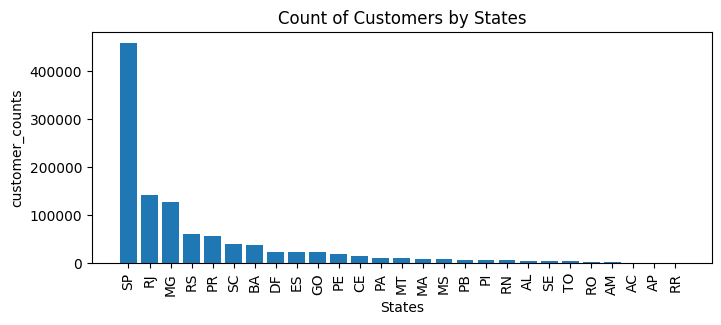

In [4]:
query="select customer_state,count(customer_id) from customers group by customer_state"
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['States','Customer_Counts'])
df=df.sort_values(by ='Customer_Counts', ascending=False)
plt.figure(figsize=(8,3))
plt.bar(df['States'],(df['Customer_Counts']))
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel('customer_counts')
plt.title('Count of Customers by States')
plt.show()

* Intermediate Queries:-
1- Calculate the number of orders per month in 2018.

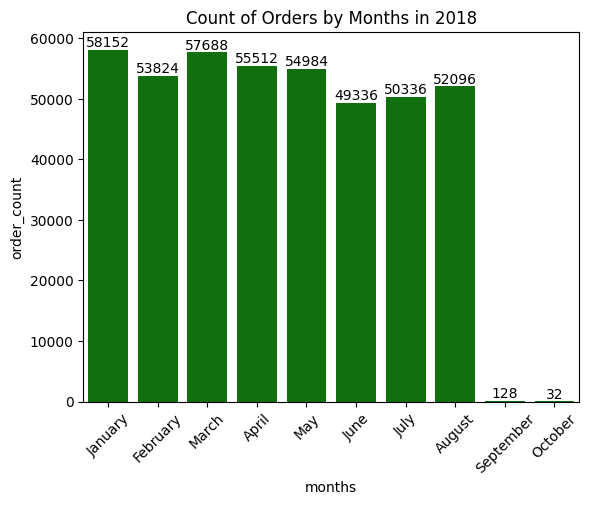

In [3]:
query="select monthname(order_purchase_timestamp) months,count(order_id) order_count from orders where year(order_purchase_timestamp) =2018 group by months"
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['months','order_count'])
o=["January","February","March","April","May","June","July","August","September","October"]
ax=sns.barplot(x=df['months'],y=df['order_count'],data=df,order=o,color="green")
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months in 2018")
plt.show()


2-  Find the average number of products per order, grouped by customer city.

In [2]:
query= """with count_per_order as
 (select orders.order_id,orders.customer_id,count(order_items.order_id)as OC from orders join order_items
 on orders.order_id=order_items.order_id
 group by orders.order_id,orders.customer_id)
 
 select customers.customer_city,round(avg(count_per_order.OC),2)average_order
 from customers join count_per_order
 on customers.customer_id=count_per_order.customer_id
 group by customers.customer_city order by average_order desc limit 10

"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['customer_city','average products/order'])
df

,customer_city,average products/order
0,padre carvalho,280.00
1,celso ramos,260.00
2,datas,240.00
3,candido godoi,240.00
4,matias olimpio,200.00
5,cidelandia,160.00
6,morro de sao paulo,160.00
7,teixeira soares,160.00
8,picarra,160.00
9,curralinho,160.00


3- Calculate the percentage of total revenue contributed by each product category.

In [3]:
query="""select (products.product_category) Category,round(sum(payments.payment_value)/(select sum(payment_value)from payments)*100,2)Sales_percentage
from products join order_items on products.product_id=order_items.product_id
join payments on payments.order_id=order_items.order_id group by Category order by sales_percentage desc"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['category','percentage distribution'])
df.head()

,category,percentage distribution
0,bed table bath,374.41
1,HEALTH BEAUTY,362.35
2,computer accessories,346.60
3,Furniture Decoration,312.68
4,Watches present,312.47


4-Identify the correlation between product price and the number of times a product has been purchased.

In [9]:
query = """select (products.product_category),count(order_items.order_id)product_count,
round(avg(order_items.price),2) product_price from products
join order_items on products.product_id=order_items.product_id
group by products.product_category
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['category','product count','product price'])
df
arr1=df['product count']
arr2=df['product price']     
a=np.corrcoef(arr1,arr2) 
print("the correlation between product price and the number of times a product has been purchased is", a[0][-1])  


the correlation between product price and the number of times a product has been purchased is -0.10631514167157562


5- Calculate the total revenue generated by each seller, and rank them by revenue.

In [8]:
query= """ select *,dense_rank()over(order by revenue desc)as rnk from
(select order_items.seller_id,round(sum(payments.payment_value),2)
revenue from order_items join payments
on order_items.order_id=payments.order_id
group by order_items.seller_id) as a"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['seller_id','revenue','rank'])
df.head(5)


,seller_id,revenue,rank
0,7c67e1448b00f6e969d365cea6b010ab,12679172.68,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,7705551.00,2
2,4a3ca9315b744ce9f8e9374361493884,7531131.74,3
3,1f50f920176fa81dab994f9023523100,7256335.50,4
4,53243585a1d6dc2643021fd1853d8905,7122577.01,5


* Advanced Queries:-
1. Calculate the moving average of order values for each customer over their order history.

In [ ]:
query="""select customer_id,order_purchase_timestamp,payment,
avg(payment)over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row)as mov_avg 
from
(select orders.customer_id,orders.order_purchase_timestamp,payments.payment_value payment
from payments join orders
on orders.order_id=payments.order_id) as a limit 10"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['customer_id','order purchace timestamp','payment','mov_avg'])
df.head()

,customer_id,order purchace timestamp,payment,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998


2. Calculate the cumulative sales per month for each year.

In [ ]:
query= """select years,months,payment,sum(payment) over (order by years,months) cumulative_sales from
(select year(orders.order_purchase_timestamp) years,month(orders.order_purchase_timestamp) months, round(sum(payments.payment_value),2) payment
from orders join payments 
on orders.order_id=payments.order_id
group by years,months order by years,months) as a
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['years','months','payment','cumulative sales'])
df.head(8)

,years,months,payment,cumulative sales
0,2016,9,10089.60,10089.60
1,2016,10,2363619.20,2373708.80
2,2016,12,784.80,2374493.60
3,2017,1,5539521.60,7914015.20
4,2017,2,11676320.38,19590335.58
5,2017,3,17994543.98,37584879.56
6,2017,4,16711521.18,54296400.74
7,2017,5,23716752.81,78013153.55


3. Calculate the year-over-year growth rate of total sales.

In [ ]:
query="""with a as(select year(orders.order_purchase_timestamp) years,
round(sum(payments.payment_value),3) payment
from orders join payments 
on orders.order_id=payments.order_id
group by years order by years)

select years, ((payment-lag(payment,1)over (order by years))/
lag(payment,1) over(order by years))*100 from a """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['years','yoy%growth'])
df

,years,yoy%growth
0,2016,NaN
1,2017,12112.703758
2,2018,20.000924


4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [ ]:
query = """with a as
(select customers.customer_id,min(orders.order_purchase_timestamp) first_order
from customers join orders 
on customers.customer_id=orders.customer_id
group by customers.customer_id), 

 b as(select a.customer_id,count(distinct orders.order_purchase_timestamp) next_order
from a join orders 
on orders.customer_id=a.customer_id
and orders.order_purchase_timestamp > first_order 
and  orders.order_purchase_timestamp < date_add(first_order, interval 6 month)
group by a.customer_id)
select 100*(count(distinct a.customer_id) /count(distinct b.customer_id))
from a left join b 
on a.customer_id=b.customer_id;
"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df

,0
0,None


5. Identify the top 3 customers who spent the most money in each year.

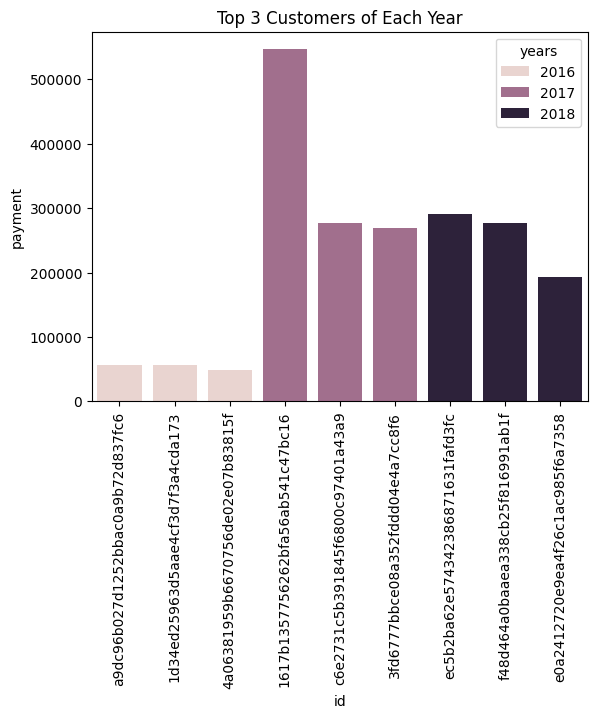

<Figure size 800x300 with 0 Axes>

In [7]:
query = """select years,customer_id,payment,d_rank
from
(select year(orders.order_purchase_timestamp)years,
orders.customer_id,
sum(payments.payment_value)payment,
dense_rank()over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value)desc) d_rank
from orders join payments
on payments.order_id=orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id)as a 
where d_rank <=3
"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['years','id','payment','rank'])
sns.barplot(x='id',y='payment',data=df,hue='years')
plt.title("Top 3 Customers of Each Year")
plt.xticks(rotation=90)
plt.figure(figsize=(8,3))
plt.show()
